# Task 1



**Описание**

Найти и выгрузить многомерные данные (с большим количеством
признаков – столбцов)  
с использованием библиотеки `pandas`. В отчёте описать найденные данные

**Решение**

In [9]:
import pandas as pd

# url = 'https://www.stats.govt.nz/assets/Uploads/Annual-enterprise-survey/Annual-enterprise-survey-2023-financial-year-provisional/Download-data/annual-enterprise-survey-2023-financial-year-provisional.csv'
url = 'data.csv'
df = pd.read_csv(url)

# Task 2

**Описание**

Вывести информацию о данных при помощи методов `.info()`, `.head()`.  
Проверить данные на наличие пустых значений. В случае их наличия  
удалить данные строки или интерполировать пропущенные значения.  
При необходимости дополнительно предобработать данные для дальнейшей работы с ними.


**Решение**

In [10]:
df.info()
df.head()

null_values = df.isnull().sum()
print('\n\nNull values:\n', null_values)

df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50985 entries, 0 to 50984
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Year                         50985 non-null  int64 
 1   Industry_aggregation_NZSIOC  50985 non-null  object
 2   Industry_code_NZSIOC         50985 non-null  object
 3   Industry_name_NZSIOC         50985 non-null  object
 4   Units                        50985 non-null  object
 5   Variable_code                50985 non-null  object
 6   Variable_name                50985 non-null  object
 7   Variable_category            50985 non-null  object
 8   Value                        50985 non-null  object
 9   Industry_code_ANZSIC06       50985 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


Null values:
 Year                           0
Industry_aggregation_NZSIOC    0
Industry_code_NZSIOC           0
Industry_name_NZSIOC           0
Units    

# Task 3

**Описание**

Построить столбчатую диаграмму (`.bar`) с использованием модуля  
`graph_objs` из библиотеки `Plotly` со следующими параметрами:  
- По оси `Х` указать дату или название, по оси `У` указать количественный показатель.  
- Сделать так, чтобы столбец принимал цвет в зависимости от значения  
показателя (`marker=dict(color=признак, coloraxis="coloraxis")`).  
- Сделать так, чтобы границы каждого столбца были выделены чёрной
линией с толщиной равной `2`.  
- Отобразить заголовок диаграммы, разместив его по центру сверху, с
`20` размером текста.  
- Добавить подписи для осей `X` и `Y` с размером текста, равным `16`. Для
оси абсцисс развернуть метки так, чтобы они читались под углом, равным `315`.  
- Размер текста меток осей сделать равным `14`.
- Расположить график во всю ширину рабочей области и присвоить
высоту, равную `700` пикселей.
- Добавить сетку на график, сделать её цвет 'ivory' и толщину равную
`2`. (Можно сделать это при настройке осей с помощью `gridwidth=2`, `gridcolor='ivory'`)
- Убрать лишние отступы по краям.

**Решение**

In [11]:
import plotly.graph_objects as go

df_filtered = df[(df['Variable_code'] == 'H34') & (
    df['Industry_aggregation_NZSIOC'] == 'Level 4')]

# Данные в числа
df_filtered.loc[:, 'Value'] = df_filtered['Value'].replace(
    {',': ''}, regex=True).astype(float)

categories = df_filtered['Industry_name_NZSIOC']
values = df_filtered['Value']

fig = go.Figure(data=[go.Bar(
    x=categories,
    y=values,
    # Настройка значений
    marker=dict(
        # Цвет по значению
        color=df_filtered['Value'],
        coloraxis="coloraxis",
        # Границы столба
        line=dict(color='black', width=2)
    ),
    marker_line=dict(
        color='black',
        width=1
    )
)])

fig.update_layout(
    title='Total Income Per Employee Count by Industry (Level 4 aggregation)',
    title_font_size=20,
    xaxis_title='Industry name',
    yaxis_title='Value ($USD)',
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    xaxis_tickangle=315,
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,
    # Настройки сетки
    xaxis=dict(
        gridwidth=2,
        gridcolor='ivory'
    ),
    yaxis=dict(
        gridwidth=2,
        gridcolor='ivory'
    ),
    height=1000,
    width=1000,
    margin=dict(
        l=20, r=20, t=50, b=0
    )
)

fig.show()

# Task 4

**Описание**

Построить круговую диаграмму (`go.Pie`), использовав данные и стиль
оформления из предыдущего графика.  
Сделать так, чтобы границы каждой доли были выделены чёрной линией с толщиной,  
равной `2` и категории круговой диаграммы были читаемы (к примеру, объединить часть объектов)

**Решение**

In [12]:
threshold = 0.004
total_value = df_filtered['Value'].sum()

df_filtered.loc[:, 'Value_fraction'] = df_filtered['Value'] / total_value

df_filtered.loc[:, 'Category'] = df_filtered.apply(
    lambda row: 'Other' if row['Value_fraction'] < threshold else row['Industry_name_NZSIOC'],
    axis=1
)

grouped_df = df_filtered.groupby('Category').sum().reset_index()

fig = go.Figure(data=[go.Pie(
    labels=grouped_df['Category'],
    values=grouped_df['Value'],
    marker=dict(
        line=dict(color='black', width=2)
    ),
    textinfo='label+percent',
    textfont_size=12,
)])

# Обновление оформления графика
fig.update_layout(
    title='Distribution of Total Income Per Employee by Industry (Level 4 agg.)',
    title_font_size=20,
    height=800,
    width=900,
    legend=dict(
        font_size=12,
        title='Industry Category',
        title_font_size=14
    ),
)

fig.show()

/tmp/ipykernel_57517/1766198444.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_57517/1766198444.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Task 5

**Описание**

Построить линейные графики, взять один из параметров и определить зависимость между `другими`  
несколькими (от `2` до `5`) показателями с использованием библиотеки `matplotlib`. Сделать вывод.
- Сделать график с линиями и маркерами, цвет линии `'crimson'`, цвет
точек `'white'`, цвет границ точек `'black'`, толщина границ точек равна `2`.
- Добавить сетку на график, сделать её цвет `'mistyrose'` и толщину
равную `2`. (Можно сделать это при настройке осей с помощью
`linewidth=2`, `color='mistyrose'`).

**Решение**

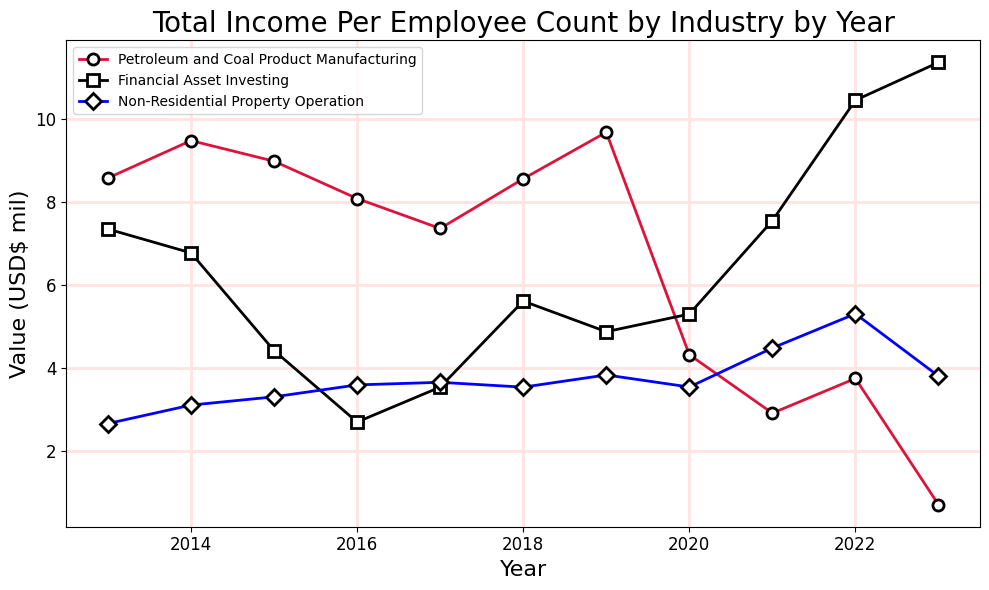

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

industry_info = {
    'CC511': {'label': 'Petroleum and Coal Product Manufacturing', 'color': 'crimson', 'marker': 'o'},
    'KK112': {'label': 'Financial Asset Investing', 'color': 'black', 'marker': 's'},
    'LL122': {'label': 'Non-Residential Property Operation', 'color': 'blue', 'marker': 'D'}
}

plt.figure(figsize=(10, 6))

for code, info in industry_info.items():
    data_subset = df_filtered[df_filtered['Industry_code_NZSIOC'] == code]
    plt.plot(data_subset['Year'], data_subset['Value'], 
             label=info['label'],
             color=info['color'], 
             marker=info['marker'], 
             markersize=8, 
             markerfacecolor='white',
             markeredgewidth=2, 
             markeredgecolor='black', 
             linewidth=2)

plt.title('Total Income Per Employee Count by Industry by Year', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Value (USD$ mil)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}'))

plt.grid(True, which='both', color='mistyrose', linewidth=2)
plt.tight_layout()
plt.legend()
plt.show()


# Task 6

**Описание**

Выполнить визуализацию многомерных данных, используя `t-SNE`.  
Необходимо использовать набор данных `MNIST` или `fashion MNIST`  
(можно использовать и другие готовые наборы данных, где можно наблюдать разделение объектов по кластерам).  
Рассмотреть результаты визуализации для разных значений перплексии. 

**Решение**

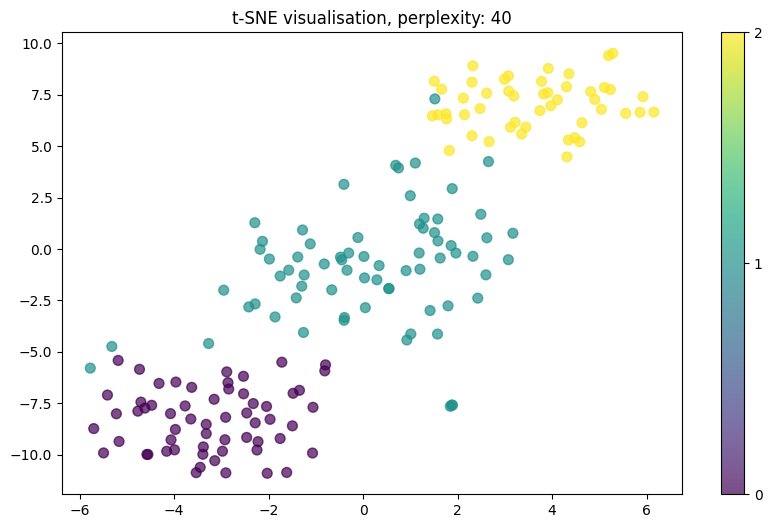

t-SNE with perplexity=40 took 0.69 seconds


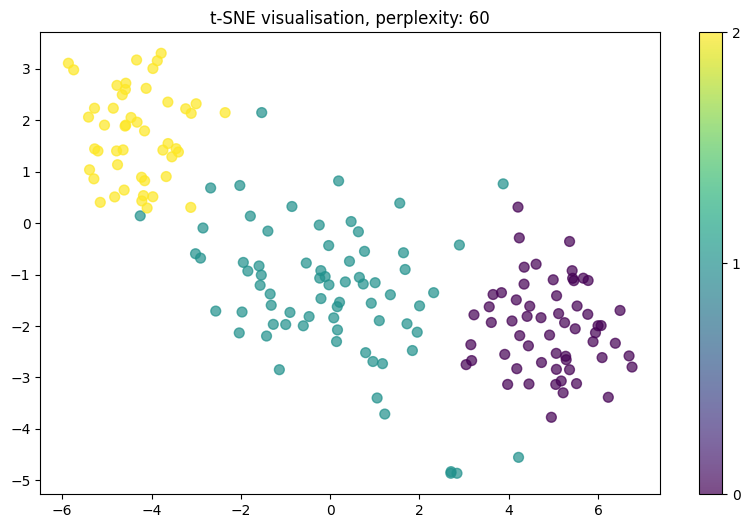

t-SNE with perplexity=60 took 0.61 seconds


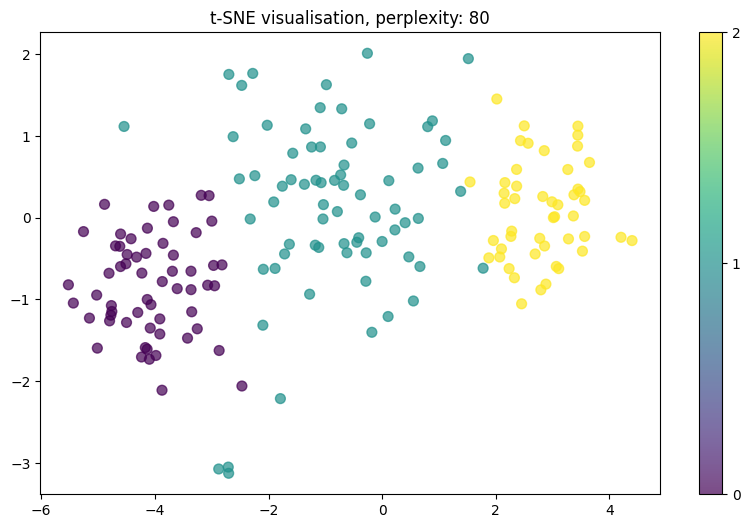

t-SNE with perplexity=80 took 0.69 seconds


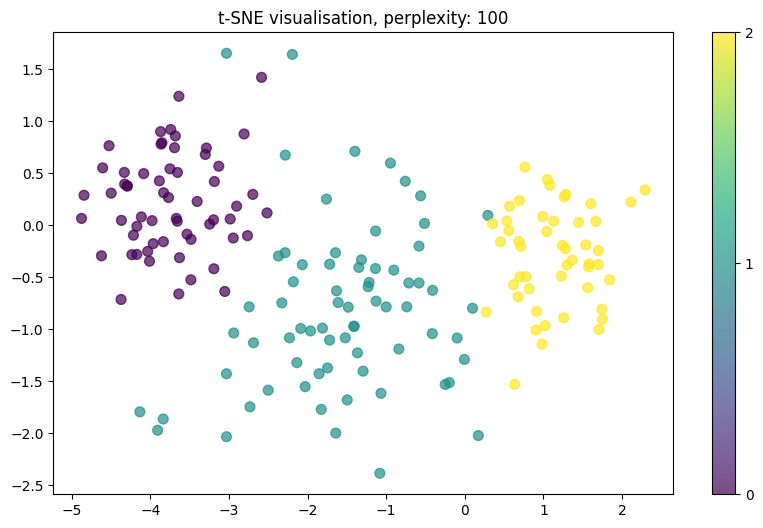

t-SNE with perplexity=100 took 1.06 seconds


In [14]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import time

ds = load_wine()

X = ds.data
y = ds.target
X = StandardScaler().fit_transform(X)


def plot_tsne(X, y, p):
    tsne = TSNE(n_components=2, perplexity=p, random_state=0)
    start_time = time.time()
    X_tsne = tsne.fit_transform(X)
    end_time = time.time()

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
                          c=y, cmap='viridis', s=50, alpha=0.7)
    plt.colorbar(scatter, ticks=np.unique(y))
    plt.title(f't-SNE visualisation, perplexity: {p}')
    plt.show()

    return end_time - start_time


perplexities = [40, 60, 80, 100]

for p in perplexities:
    elapsed_time = plot_tsne(X, y, p)
    print(f't-SNE with perplexity={p} took {elapsed_time:.2f} seconds')

# Task 7

**Описание**

Выполнить визуализацию многомерных данных, используя `UMAP` с различными параметрами `n_neighbors` и `min_dist`.  
Рассчитать время работы алгоритма с помощью библиотеки `time` и сравнить его с временем работы `t-SNE`.

**Решение**

/home/slashersdcat/.local/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



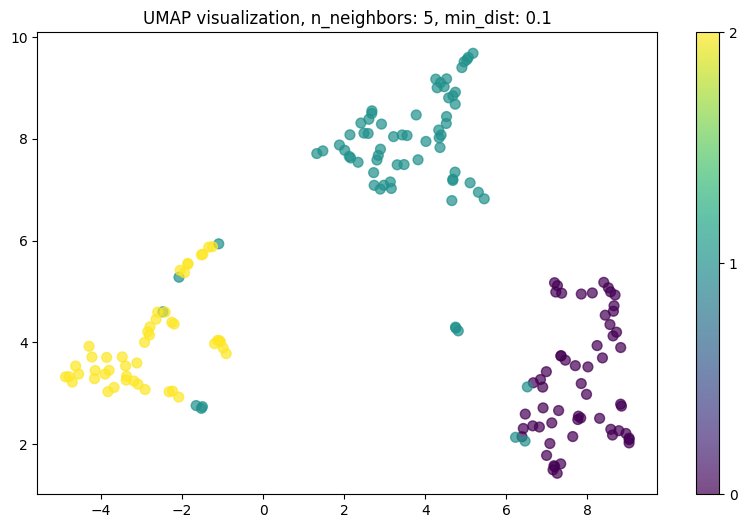

UMAP with n_neighbors=5 and min_dist=0.1 took 6.84 seconds


/home/slashersdcat/.local/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



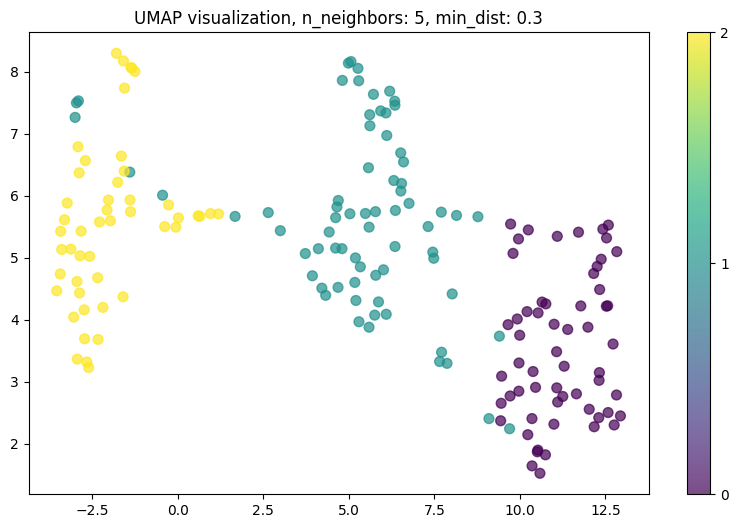

UMAP with n_neighbors=5 and min_dist=0.3 took 0.86 seconds


/home/slashersdcat/.local/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



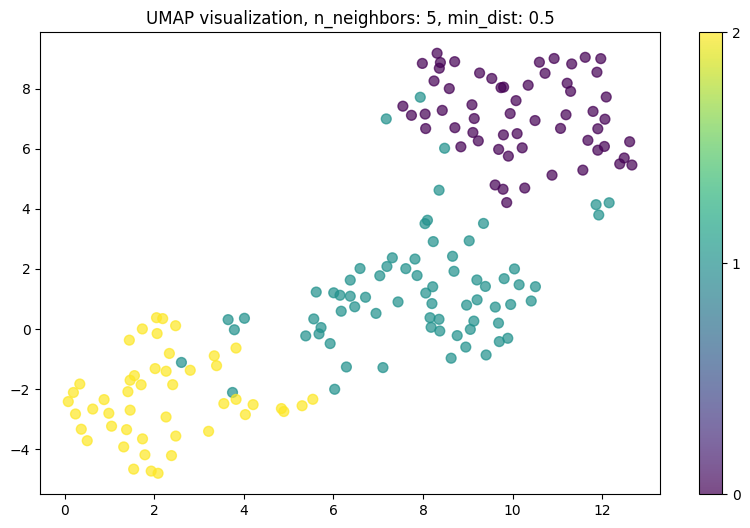

UMAP with n_neighbors=5 and min_dist=0.5 took 0.95 seconds


/home/slashersdcat/.local/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



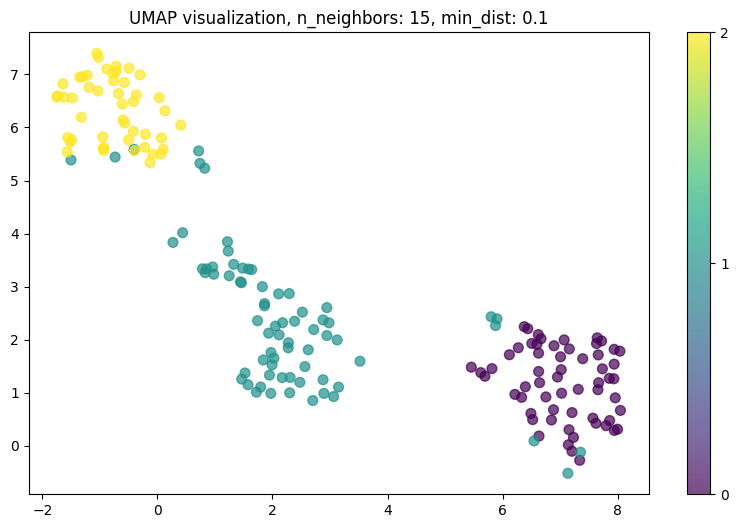

UMAP with n_neighbors=15 and min_dist=0.1 took 1.01 seconds


/home/slashersdcat/.local/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



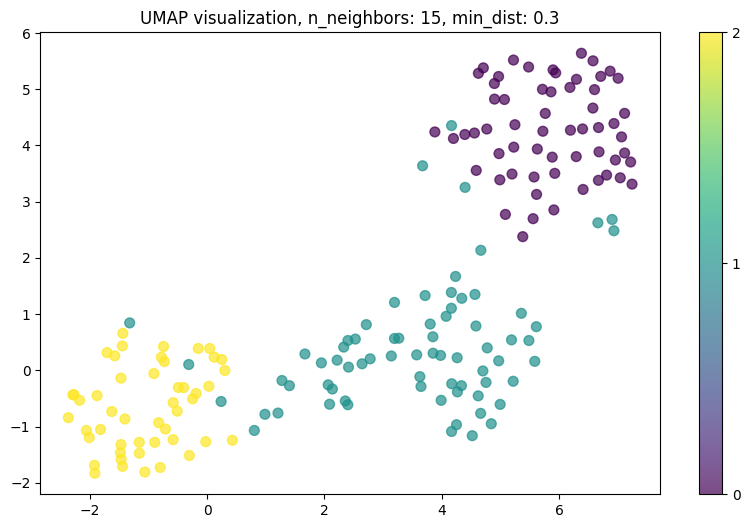

UMAP with n_neighbors=15 and min_dist=0.3 took 1.13 seconds


/home/slashersdcat/.local/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



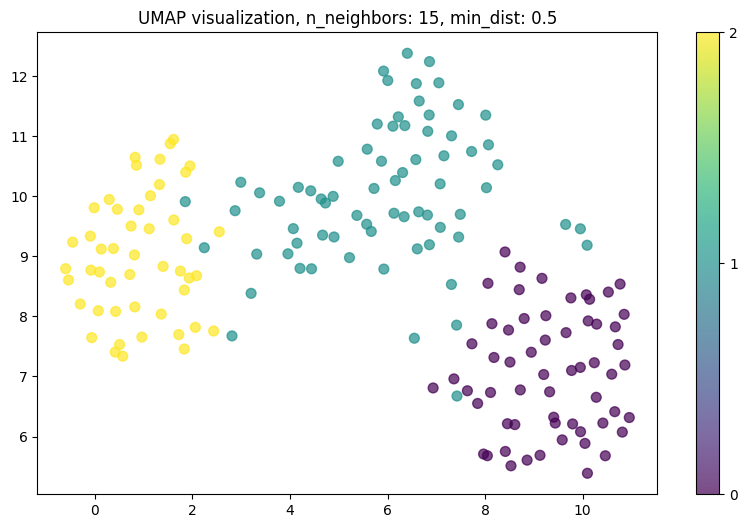

UMAP with n_neighbors=15 and min_dist=0.5 took 1.00 seconds


/home/slashersdcat/.local/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



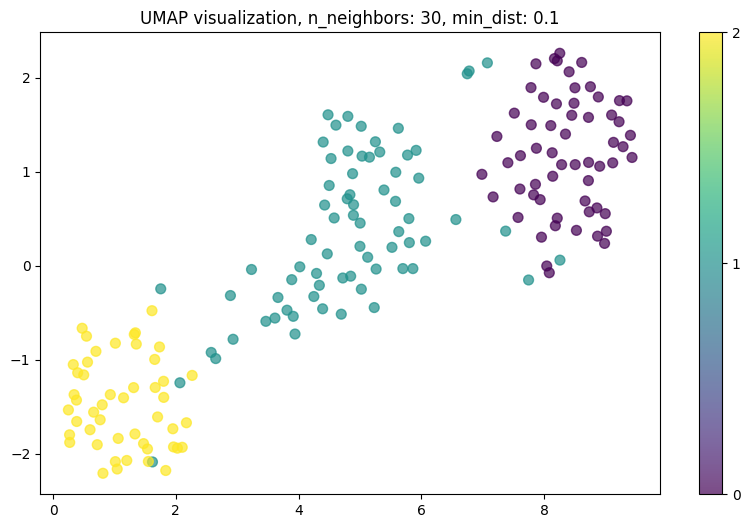

UMAP with n_neighbors=30 and min_dist=0.1 took 1.17 seconds


/home/slashersdcat/.local/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



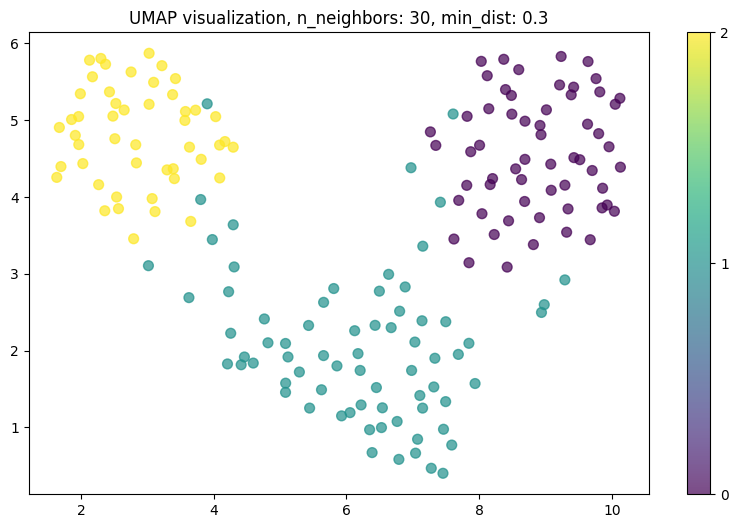

UMAP with n_neighbors=30 and min_dist=0.3 took 1.26 seconds


/home/slashersdcat/.local/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



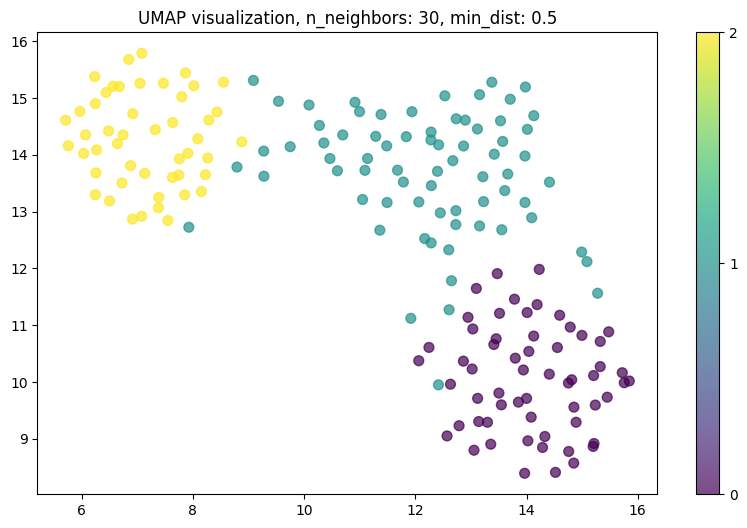

UMAP with n_neighbors=30 and min_dist=0.5 took 1.48 seconds


In [15]:
import umap.umap_ as umap

def plot_umap(X, y, n_neighbors, min_dist):
    umap_model = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=0)
    start_time = time.time()
    X_umap = umap_model.fit_transform(X)
    end_time = time.time()

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
    plt.colorbar(scatter, ticks=np.unique(y))
    plt.title(f'UMAP visualization, n_neighbors: {n_neighbors}, min_dist: {min_dist}')
    plt.show()
    
    return end_time - start_time

n_neighbors_list = [5, 15, 30]
min_dist_list = [0.1, 0.3, 0.5]
for n in n_neighbors_list:
    for min_dist in min_dist_list:
        elapsed_time = plot_umap(X, y, n, min_dist)
        print(f"UMAP with n_neighbors={n} and min_dist={min_dist} took {elapsed_time:.2f} seconds")
